In [9]:
from pathlib import Path

import h5py

from pmdd.utils.calc_utils import curl_2d, curl_3d, div_2d, div_3d
from pmdd.utils.plot_utils import plot_magfield

### Loading database with magnetic fields

The file `magfield_symm_64.h5` is in [h5py-format](https://docs.h5py.org/en/stable/quick.html).

The numpy array with all the field information is stored in `db['field']`.

In [5]:
data_path = Path.cwd() / '..' / 'data'
db = h5py.File(data_path / 'magfield_symm_32_z.h5')
print(f'Number of samples: {len(db["field"])}')
print(db['field'][0].shape)

Number of samples: 10
(3, 32, 32)


### Function for plotting magnetic field data

<Figure size 640x480 with 0 Axes>

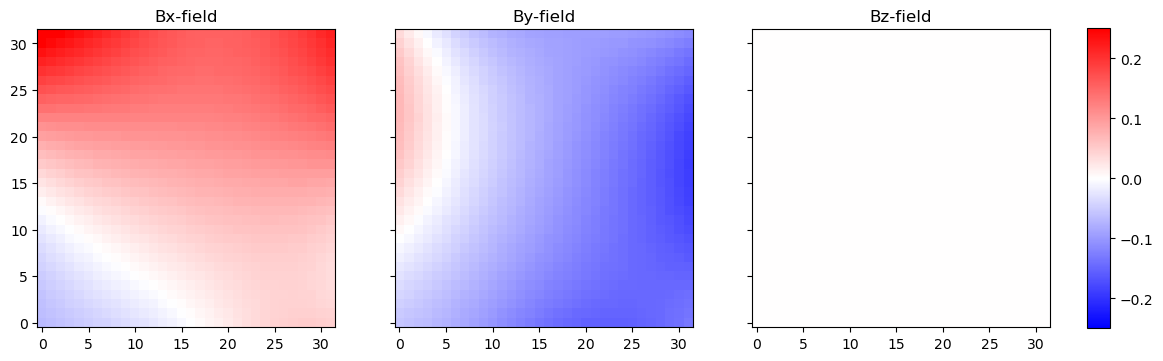

<Figure size 640x480 with 0 Axes>

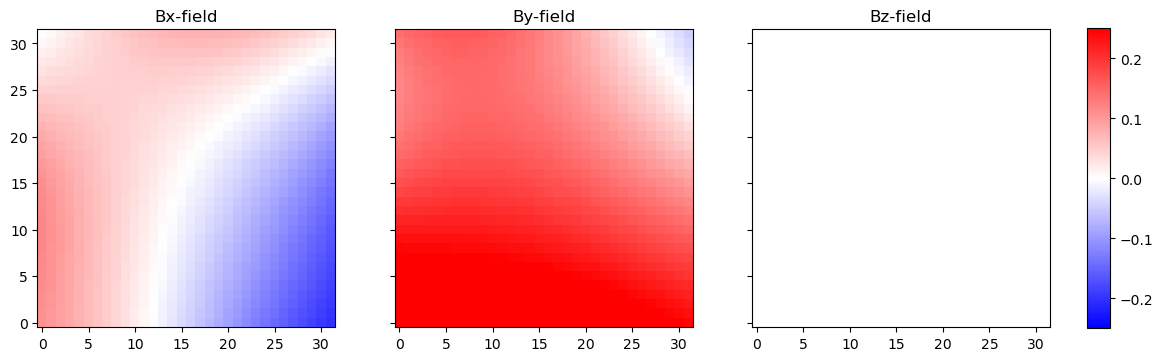

<Figure size 640x480 with 0 Axes>

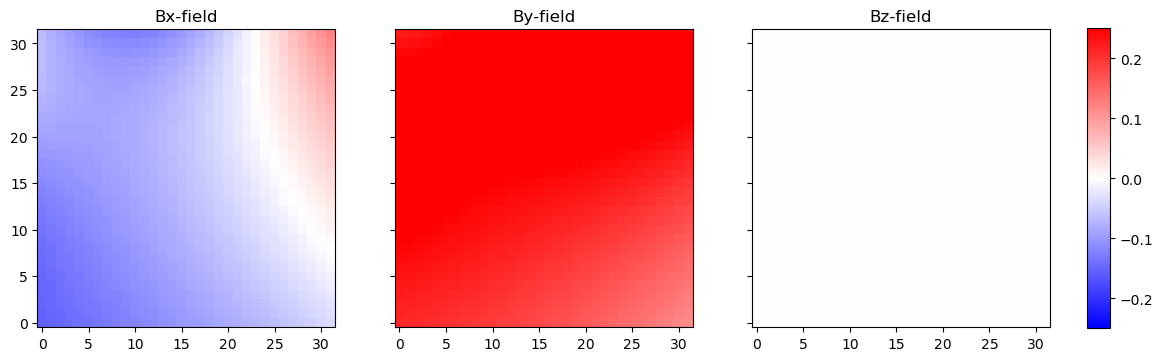

In [7]:
for i in range(3):
    field = db['field'][i]
    plot_magfield(field, vmax=0.25)

## Calculated divergence and curl of 2D fields

In [11]:
for i in range(3):
    field = db['field'][i]
    print(f'Divergence: {abs(div_2d(field)).mean()}')
    print(f'Curl: {abs(curl_2d(field)).mean()}')

Divergence: 4.216679008095525e-05
Curl: 4.249435005476698e-05
Divergence: 3.103858034592122e-05
Curl: 2.886842230509501e-05
Divergence: 3.585187369026244e-05
Curl: 2.85489277302986e-05


### Loading database with volume of magnetic field measurements

In [ ]:
db_3D = h5py.File('/home/s214435/data/magfield_96.h5')
print(db_3D['field'][0].shape)

<Figure size 640x480 with 0 Axes>

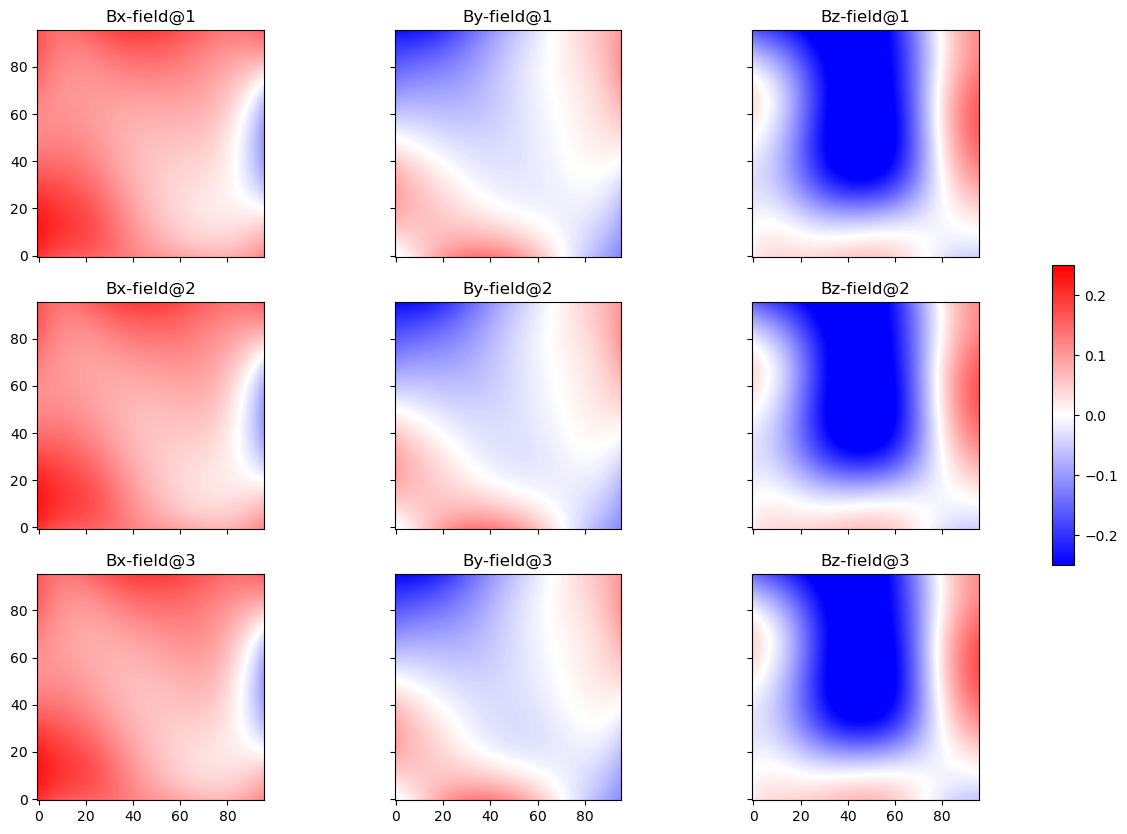

Divergence: 0.0011482330737635493
Curl: 0.001009089406579733


<Figure size 640x480 with 0 Axes>

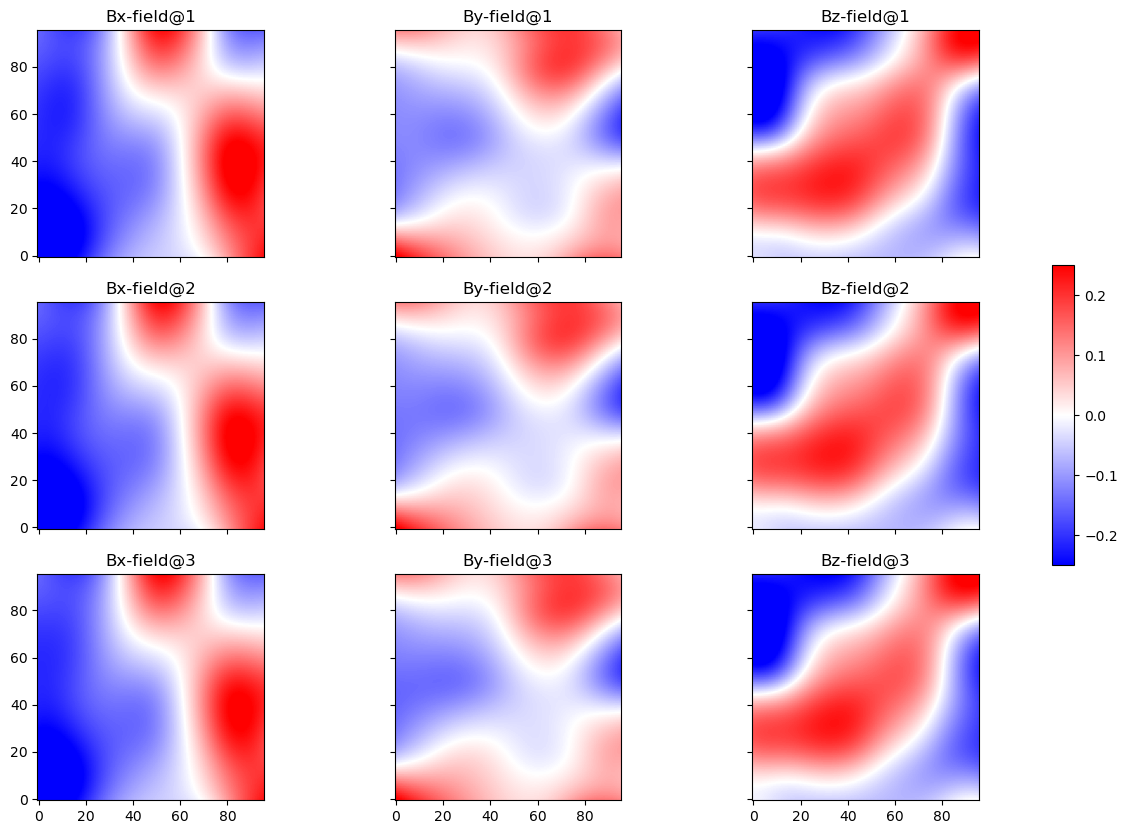

Divergence: 0.0022864274214953184
Curl: 0.0013167919823899865


<Figure size 640x480 with 0 Axes>

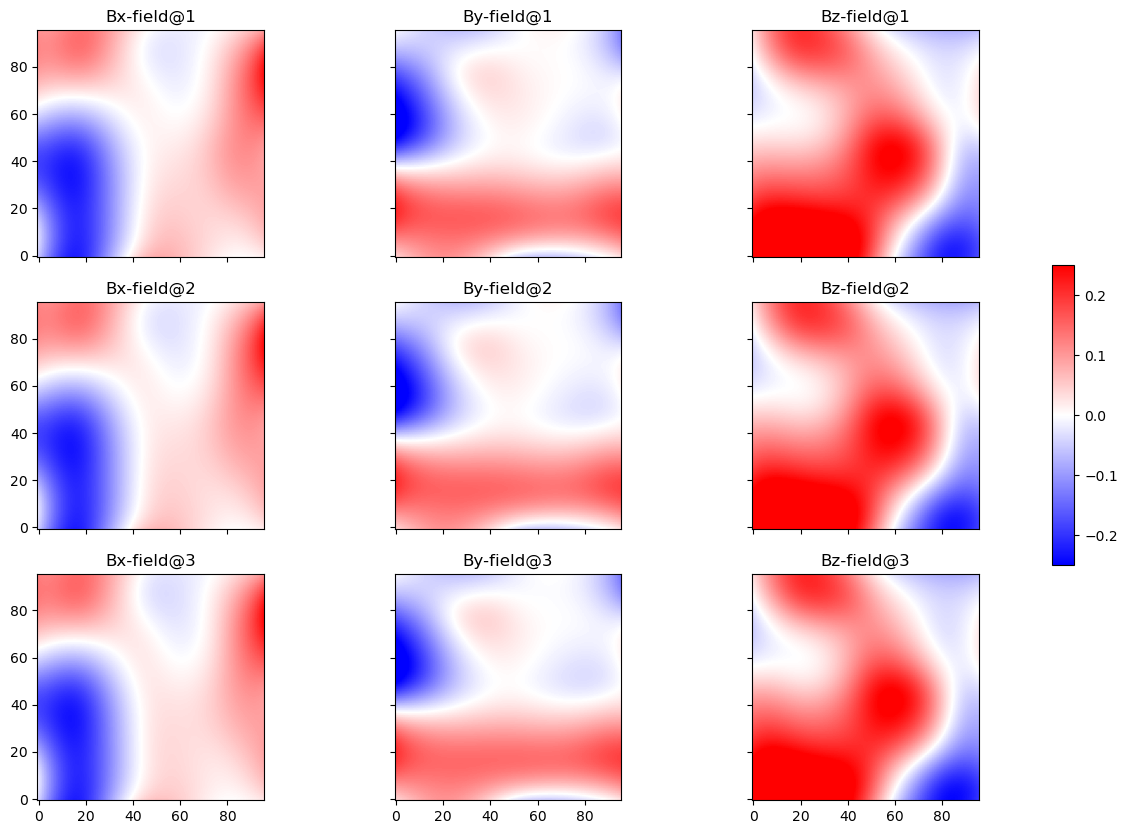

Divergence: 0.002057803561910987
Curl: 0.0010717363329604268


In [17]:
for i in range(3):
    field_3D = db_3D['field'][i]
    plot_magfield(field_3D, vmax=0.25)
    print(f'Divergence: {abs(div_3d(field_3D)).mean()}')
    print(f'Curl: {abs(curl_3d(field_3D)).mean()}')

In [ ]:
db.close()
db_3D.close()

### Test with fields of shape (3, 256, 256, 3)

(3, 256, 256, 3)


<Figure size 640x480 with 0 Axes>

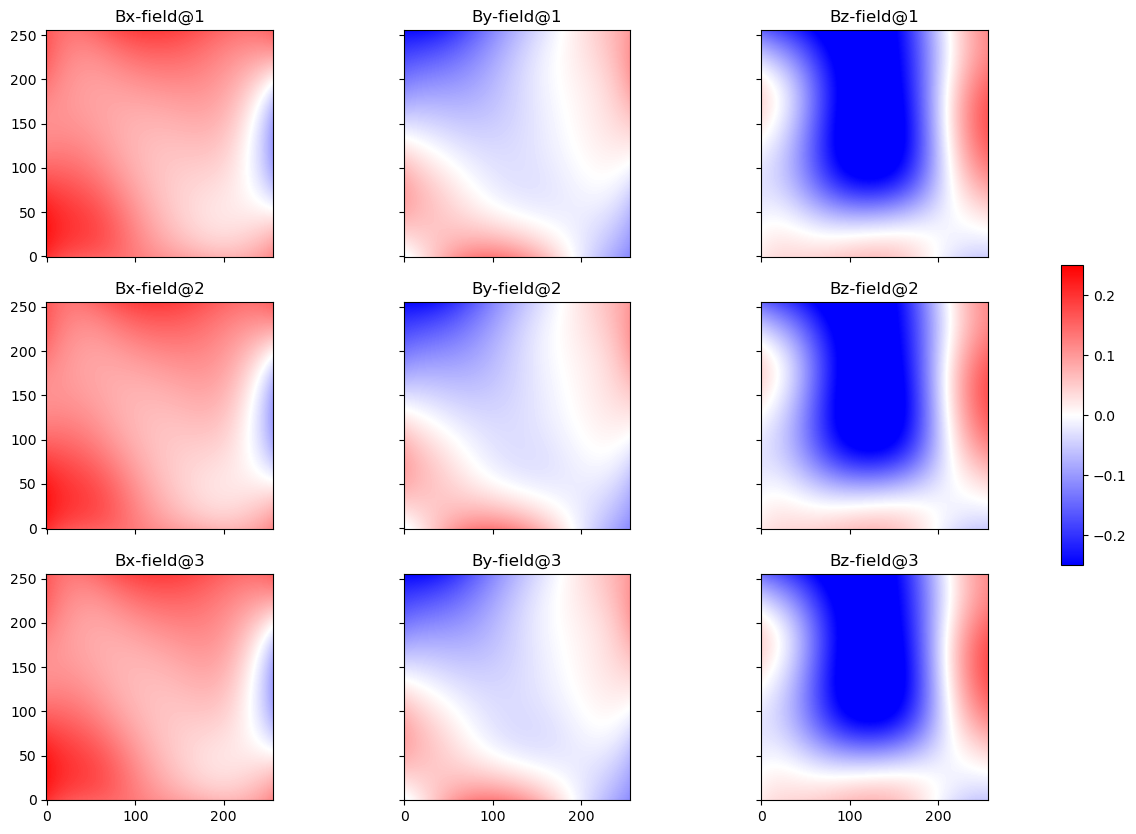

Divergence: 5.026547114539426e-06
Curl: 4.371260274638189e-06


<Figure size 640x480 with 0 Axes>

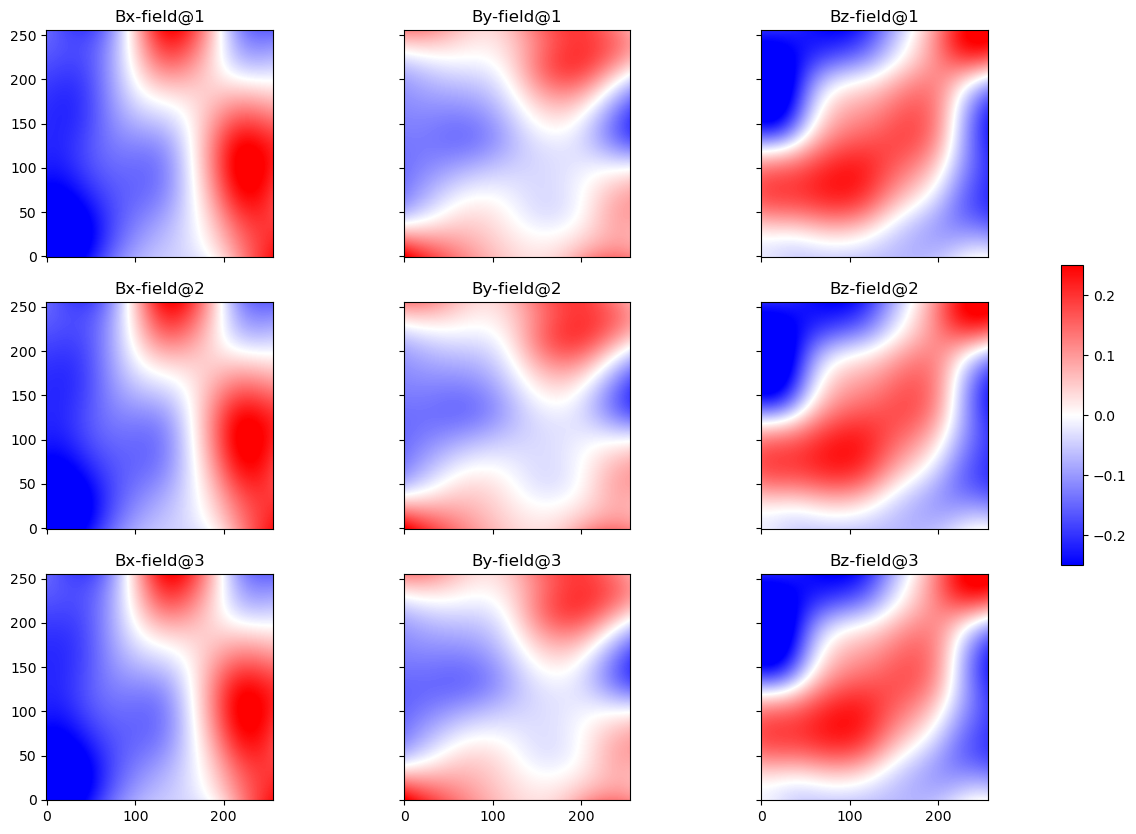

Divergence: 9.332180525234435e-06
Curl: 5.64972469874192e-06


<Figure size 640x480 with 0 Axes>

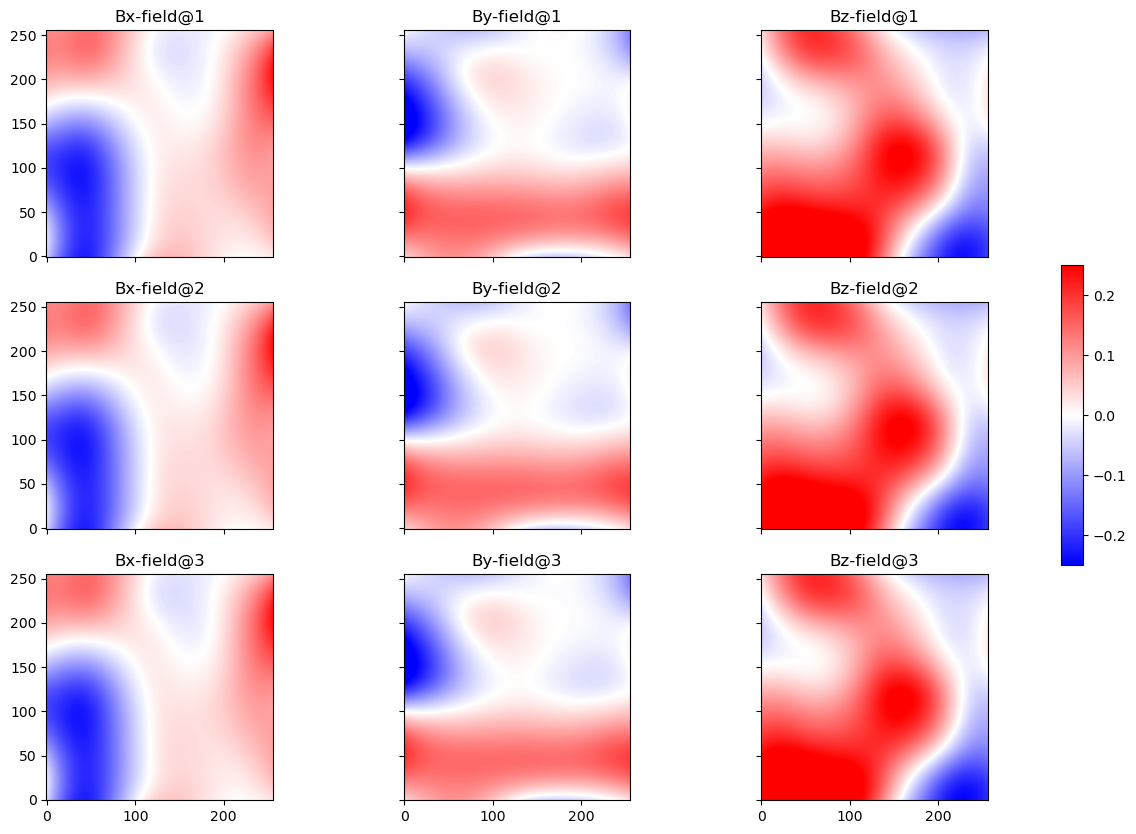

Divergence: 8.317369065480307e-06
Curl: 4.661237198888557e-06


In [9]:
db_256 = h5py.File('/home/s214435/data/magfield_256.h5')
print(db_256['field'][0].shape)
for i in range(3):
    field_256 = db_256['field'][i]
    plot_magfield(field_256, vmax=0.25)
    print(f'Divergence: {abs(div_3d(field_256)).mean()}')
    print(f'Curl: {abs(curl_3d(field_256)).mean()}')
db_256.close()